In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from IPython.display import clear_output
from tqdm import tqdm
#from tqdm.notebook import tqdm
import math
import scipy.stats as stat

import polars as pl
import random
def display_full(x):
    pd.set_option('display.max_rows', len(x))
    pd.set_option('display.max_columns', x.shape[1])
    display(x.style.set_sticky(axis = 'columns'))
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')

# simulation

## inventory strategy

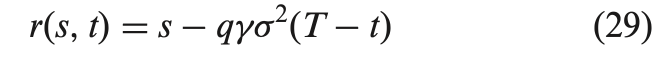

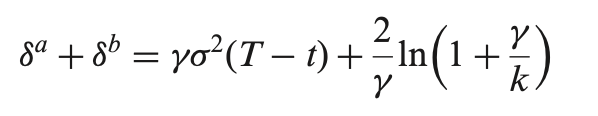

In [133]:
# inventory strat
iteration = 1
profit_array = []
spread_array = []
final_q_array = []
while iteration <= 1000 :
    # constants/parameters
    s = 100
    w = 100
    T = 1
    sigma = 2
    dt = 0.005
    q = 0
    gamma = 0.1
    k = 1.5
    A = 140
    t = 0
    mid_price = 100
    qa = 0
    qb = 0
    
    # array declaration
    mid_price_list = []
    prob_a_list = [] # computed-ask probability array
    prob_b_list = [] # computed-bid probability array
    pa_list = [] # randomly generated ask probability array
    pb_list = [] # randomly generated bid probability array
    ra_list = [] # ask quote array
    rb_list = [] # bid quote array
    final_q = [] # final count of inventory array
    final_q.append(0)
    rp_list = [] # reservation price array
    delta_a_list = []
    delta_b_list = []
    spread_list = []
    profit_list = []
    qa_list = [] # ask inventory array
    qb_list = [] # bid inventory array
    dt_list = [] # timestap array
    while t <= T :
        dt_list.append(t)


        rp = s - q*gamma*(sigma**2)*(T-t)
        rp_list.append(rp)

        spread = gamma*(sigma**2)*(T-t) + (2/gamma)*np.log(1 + gamma/k)
        spread_list.append(spread)

        ra = rp + spread/2
        rb = rp - spread/2
        ra_list.append(ra)
        rb_list.append(rb)

        delta_a = ra - s
        delta_b = s - rb

        delta_a_list.append(delta_a)
        delta_b_list.append(delta_b)

        lambda_a = A * math.e**(-k*delta_a)
        lambda_b = A * math.e**(-k*delta_b)


        prob_a = 1 - math.e**(-lambda_a * dt)
        prob_b = 1 - math.e**(-lambda_b * dt)


        prob_a_list.append(prob_a)
        prob_b_list.append(prob_b)    

        mid_price_list.append(s)

        pa = random.random()
        pa_list.append(pa)
        pb = random.random()
        pb_list.append(pb)

        if pa <= prob_a:
            qa = 1
        elif pa > prob_a :
            qa = 0

        if pb <= prob_b :
            qb = 1
        elif pb > prob_b :
            qb = 0
            
        profit_list.append(ra*qa - rb*qb)
        q = final_q[-1] + qb - qa
        final_q.append(q)
        qa_list.append(qa)
        qb_list.append(qb)

#         print('s : {s}, r : {r}, ra : {ra}, rb : {rb}'.format(s = '%.2f'%(s),
#                                                               r = '%.2f'%(rp),
#                                                               ra = '%.2f'%(ra),
#                                                               rb = '%.2f'%(rb)))
        s += random.uniform(-sigma * dt**(0.5), sigma * dt**(0.5))
        t += dt
        
    profit_array.append(sum(profit_list))
    spread_array.append(spread_list)
    final_q_array.append(final_q[-1])
    iteration += 1

## symmetric strategy (benchmark)

In [134]:
# symmetric strat
iteration = 1
profit_bm_array = []
spread_bm_array = []
final_q_bm_array = []
while iteration <= 1000 :
    # constants/parameters declaration
    s = 100
    w = 100
    T = 1
    sigma = 2
    dt = 0.005
    q = 0
    gamma = 0.1
    k = 1.5
    A = 140
    t = 0
    mid_price = 100
    qa = 0
    qb = 0
    
    
    # array declaration
    mid_price_list = []
    prob_a_list = [] # computed-ask probability array
    prob_b_list = [] # computed-bid probability array
    pa_list = [] # randomly generated ask probability array
    pb_list = [] # randomly generated bid probability array
    ra_list = [] # ask quote array
    rb_list = [] # bid quote array
    final_q_is = [] # final count of inventory array
    final_q_is.append(0)
    rp_list = [] # reservation price array
    delta_a_list = []
    delta_b_list = []
    spread_list = []
    profit_list = []

    qa_list = [] # ask inventory array
    qb_list = [] # bid inventory array
    dt_list = [] # timestap array
    while t <= T :
        
        dt_list.append(t)

        rp = s - q*gamma*(sigma**2)*(T-t)
        rp_list.append(rp)

        spread = gamma*(sigma**2)*(T-t) + (2/gamma)*np.log(1 + gamma/k)
        spread_list.append(spread)

        ra = s + spread/2
        rb = s - spread/2
        ra_list.append(ra)
        rb_list.append(rb)

        delta_a = ra - s
        delta_b = s - rb

        delta_a_list.append(delta_a)
        delta_b_list.append(delta_b)

        lambda_a = A * math.e**(-k*delta_a)
        lambda_b = A * math.e**(-k*delta_b)


        prob_a = 1 - math.e**(-lambda_a * dt)
        prob_b = 1 - math.e**(-lambda_b * dt)


        prob_a_list.append(prob_a)
        prob_b_list.append(prob_b)    

        mid_price_list.append(s)

        pa = random.random()
        pa_list.append(pa)
        pb = random.random()
        pb_list.append(pb)

        if pa <= prob_a:
            qa = 1
        elif pa > prob_a :
            qa = 0

        if pb <= prob_b :
            qb = 1
        elif pb > prob_b :
            qb = 0

        profit_list.append(ra*qa - rb*qb)
        q = final_q_is[-1] + qb - qa
        final_q_is.append(q)
        qa_list.append(qa)
        qb_list.append(qb)

        s += random.uniform(-sigma * dt**(0.5), sigma * dt**(0.5))
        t += dt
        
    profit_bm_array.append(sum(profit_list))
    spread_bm_array.append(spread_list)
    final_q_bm_array.append(final_q[-1])
    iteration += 1

## simulation comparison between strategies

In [135]:
pd.DataFrame(({'Strategy' : ['Inventory', 'Symmetric'],
               'Average Spread' : [np.mean(np.array(spread_array).reshape(1000, 200)),
                                   np.mean(np.array(spread_bm_array).reshape(1000, 200))],
               'Profit' : [np.mean(np.array(profit_array)),
                           np.mean(np.array(profit_bm_array))],
               'Std (Profit)' : [np.std(np.array(profit_array)),
                                 np.std(np.array(profit_bm_array))],
               'Final q' : [np.mean(np.array(final_q_array)),
                            np.mean(np.array(final_q_bm_array))],
               'Std (Final q)' : [np.std(np.array(final_q_array)),
                                  np.std(np.array(final_q_bm_array))]}))

,Strategy,Average Spread,Profit,Std (Profit),Final q,Std (Final q)
0,Inventory,1.49177,65.407329,292.555419,-0.084,2.923516
1,Symmetric,1.49177,71.979199,794.516366,-2.000,0.000000


## sample inventory strategy plot

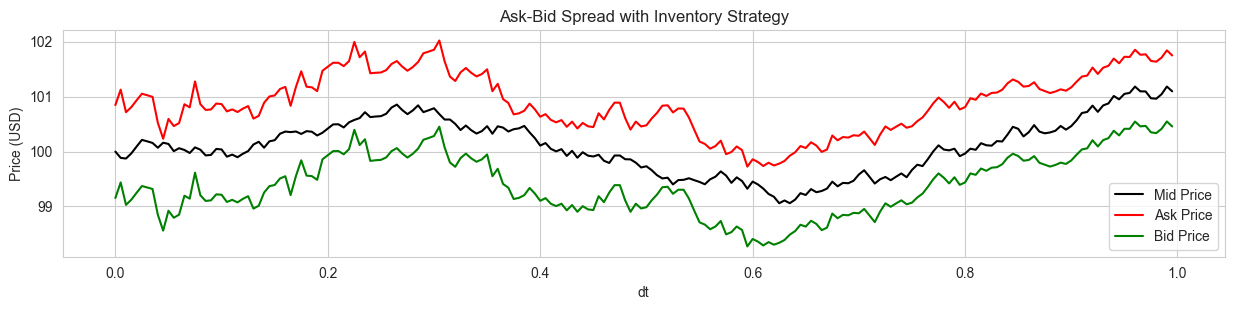

In [153]:
s = 100
T = 1
sigma = 2
dt = 0.005
q = 0
gamma = 0.1
k = 1.5
A = 140
t = 0
qa = 0
qb = 0

mid_price_list = []
prob_a_list = [] # computed-ask probability array
prob_b_list = [] # computed-bid probability array
pa_list = [] # randomly generated ask probability array
pb_list = [] # randomly generated bid probability array
ra_list = [] # ask quote array
rb_list = [] # bid quote array
final_q = [] # final count of inventory array
final_q.append(0)
rp_list = [] # reservation price array
delta_a_list = []
delta_b_list = []
spread_list = []
profit_list = []
qa_list = [] # ask inventory array
qb_list = [] # bid inventory array
dt_list = [] # timestap array
while t <= T :
    dt_list.append(t)

    s = mid_price_fix[i]
    rp = s - q*gamma*(sigma**2)*(T-t)
    rp_list.append(rp)

    spread = gamma*(sigma**2)*(T-t) + (2/gamma)*np.log(1 + gamma/k)
    spread_list.append(spread)

    ra = rp + spread/2
    rb = rp - spread/2
    ra_list.append(ra)
    rb_list.append(rb)

    delta_a = ra - s
    delta_b = s - rb

    delta_a_list.append(delta_a)
    delta_b_list.append(delta_b)

    lambda_a = A * math.e**(-k*delta_a)
    lambda_b = A * math.e**(-k*delta_b)


    prob_a = 1 - math.e**(-lambda_a * dt)
    prob_b = 1 - math.e**(-lambda_b * dt)


    prob_a_list.append(prob_a)
    prob_b_list.append(prob_b)    

    mid_price_list.append(s)

    pa = random.random()
    pa_list.append(pa)
    pb = random.random()
    pb_list.append(pb)

    if pa <= prob_a:
        qa = 1
    elif pa > prob_a :
        qa = 0

    if pb <= prob_b :
        qb = 1
    elif pb > prob_b :
        qb = 0

    profit_list.append(ra*qa - rb*qb)
    q = final_q[-1] + qb - qa
    final_q.append(q)
    qa_list.append(qa)
    qb_list.append(qb)

#         print('s : {s}, r : {r}, ra : {ra}, rb : {rb}'.format(s = '%.2f'%(s),
#                                                               r = '%.2f'%(rp),
#                                                               ra = '%.2f'%(ra),
#                                                               rb = '%.2f'%(rb)))
    s += random.uniform(-sigma * dt**(0.5), sigma * dt**(0.5))
    t += dt
    i += 1

plt.figure(figsize = [15, 3], dpi = 100)
sns.lineplot(y = mid_price_list,
             x = dt_list, color = 'black', label = 'Mid Price')
# sns.lineplot(y = reservation_price_list,
#              x = dt_list, color = 'blue')
sns.lineplot(y = ra_list,
             x = dt_list, color = 'red', label = 'Ask Price')
sns.lineplot(y = rb_list,
             x = dt_list, color = 'green', label = 'Bid Price')
plt.title('Ask-Bid Spread with Inventory Strategy')
plt.ylabel('Price (USD)')
plt.xlabel('dt')
plt.show()


In [157]:
pd.DataFrame({'reservation_ask' : ra_list,
              'mid_price' : mid_price_list,
              'reservation_bid' : rb_list}).to_csv('mid_spread_data.csv',
                                                   index = False)

# parameters effect

In [74]:
mid_price_fix = [100,
                  99.88485604224289,
                  99.87309441965178,
                  99.96578386895159,
                100.09149287172762,
                100.21254251773048,
                100.18592997009702,
                100.15680541526626,
                100.06965308676645,
                100.16105530077552,
                100.13860950214477,
                100.00730943104976,
                100.06091325917225,
                100.02895877799982,
                99.97400654449298,
                100.07631135229045,
                100.034052365176,
                99.92962238757693,
                99.93875986864269,
                100.04768349238215,
                100.03865280026088,
                99.90678592754344,
                99.9444033821738,
                99.89717924624901,
                99.95941504071669,
                100.00817570297052,
                100.12837807288348,
                100.17844736587664,
                100.0702690460286,
                100.18628285953082,
                100.20659951993102,
                100.32444998025622,
                100.36420182028102,
                100.35418303200123,
                100.36541098038104,
                100.32077940659525,
                100.3717038231522,
                100.36092579458371,
                100.2928958796047,
                100.34301302054723,
                100.41985713261587,
                100.49436157804098,
                100.49691083321284,
                100.43896467463941,
                100.53231337976341,
                100.57610994190749,
                100.60963091909808,
                100.7164483432406,
                100.6275198403181,
                100.63794307306412,
                100.64414650935733,
                100.6879302028164,
                100.80103332189866,
                100.855043881088,
                100.7571374808463,
                100.68099971549084,
                100.7482933762457,
                100.84145461896817,
                100.71777960006001,
                100.75154527350286,
                100.78862516555918,
                100.68118246958359,
                100.58268119440928,
                100.58345300200175,
                100.50365453925482,
                100.39202872574666,
                100.474017062196,
                100.38917074366562,
                100.32765056344631,
                100.37152537520933,
                100.4623840278525,
                100.32492239750064,
                100.45994634756657,
                100.43628455643073,
                100.36513185122901,
                100.40677824277545,
                100.42248038824364,
                100.46691107073887,
                100.34901279030663,
                100.24317216312146,
                100.108729401677,
                100.15490088136548,
                100.04905784228892,
                100.00381765879659,
                100.04351412085289,
                99.92070103119552,
                100.01320193335674,
                99.88802294871803,
                99.98742598819747,
                99.9253437903073,
                99.91059293908837,
                99.94176856128676,
                99.8324180196803,
                99.79259775267089,
                99.92786783364987,
                99.92850166882037,
                99.86025188733647,
                99.8576284605319,
                99.79796304135759,
                99.71046175850924,
                99.73245287049656,
                99.6604100383649,
                99.56920920609952,
                99.5108765483724,
                99.52423860751044,
                99.40169858151943,
                99.48088795066069,
                99.48522531735624,
                99.51402853417139,
                99.47916143492876,
                99.44714013975126,
                99.40471173583421,
                99.49543547064413,
                99.54232636535278,
                99.63892281092879,
                99.56271502583955,
                99.43043476333943,
                99.53029287579646,
                99.46401198530813,
                99.32334027451314,
                99.45371034330661,
                99.40096474944748,
                99.32596233163467,
                99.22808351999807,
                99.17772292304784,
                99.05945994109891,
                99.10944726357593,
                99.06014268201051,
                99.12521282116049,
                99.24207632123016,
                99.2094700506623,
                99.31640539646148,
                99.2595631768532,
                99.281896371037,
                99.32590406718849,
                99.45192357760355,
                99.3672056366499,
                99.42979113693802,
                99.42277326316251,
                99.46832271799582,
                99.5819225725047,
                99.65993622933668,
                99.54060983182433,
                99.41803189613945,
                99.49602863782499,
                99.53741458369842,
                99.47866147944579,
                99.54164062606888,
                99.60157634950286,
                99.53276543788544,
                99.66534747952011,
                99.76038994459088,
                99.73595075241194,
                99.86270359611095,
                100.00200687567278,
                100.11303249160375,
                100.03664366161644,
                100.02231888987629,
                100.05175626788626,
                99.91650640997543,
                99.96351249197728,
                100.05225611675792,
                100.0319797860993,
                100.15185335725113,
                100.11509701720108,
                100.10697490807193,
                100.19058032787261,
                100.18344853288481,
                100.30981262497674,
                100.45032335819549,
                100.41447840484761,
                100.27581823836988,
                100.35254535174084,
                100.48155361273211,
                100.36319526431049,
                100.33221140576451,
                100.3477758561229,
                100.37826766605454,
                100.46537939099001,
                100.39930191576053,
                100.4638533932712,
                100.56913187400542,
                100.70203917316853,
                100.72110561540785,
                100.83632854281382,
                100.72291252843506,
                100.83944774426124,
                100.87647872290549,
                101.01155211448959,
                100.95062247365928,
                101.04975015009859,
                101.06819906558079,
                101.18323346213835,
                101.09646755783757,
                101.09441846646247,
                100.9704647217248,
                100.961846092824,
                101.04359664977547,
                101.18328207176879,
                101.09735881478868]

In [98]:
def simulation(s = 100,
               T = 1,
               sigma = 2,
               dt = 0.005,
               q = 0,
               gamma = 0.1,
               k = 1.5,
               A = 140,
               t = 0,
               qa = 0,
               qb = 0,
               mid_price_fix = mid_price_fix) :
    mid_price_list = []
    prob_a_list = [] # computed-ask probability array
    prob_b_list = [] # computed-bid probability array
    pa_list = [] # randomly generated ask probability array
    pb_list = [] # randomly generated bid probability array
    ra_list = [] # ask quote array
    rb_list = [] # bid quote array
    final_q = [] # final count of inventory array
    final_q.append(0)
    rp_list = [] # reservation price array
    delta_a_list = []
    delta_b_list = []
    spread_list = []
    profit_list = []
    qa_list = [] # ask inventory array
    qb_list = [] # bid inventory array
    dt_list = [] # timestap array
    i = 0
    while t <= T :
        dt_list.append(t)

        s = mid_price_fix[i]
        rp = s - q*gamma*(sigma**2)*(T-t)
        rp_list.append(rp)

        spread = gamma*(sigma**2)*(T-t) + (2/gamma)*np.log(1 + gamma/k)
        spread_list.append(spread)

        ra = rp + spread/2
        rb = rp - spread/2
        ra_list.append(ra)
        rb_list.append(rb)

        delta_a = ra - s
        delta_b = s - rb

        delta_a_list.append(delta_a)
        delta_b_list.append(delta_b)

        lambda_a = A * math.e**(-k*delta_a)
        lambda_b = A * math.e**(-k*delta_b)


        prob_a = 1 - math.e**(-lambda_a * dt)
        prob_b = 1 - math.e**(-lambda_b * dt)


        prob_a_list.append(prob_a)
        prob_b_list.append(prob_b)    

        mid_price_list.append(s)

        pa = random.random()
        pa_list.append(pa)
        pb = random.random()
        pb_list.append(pb)

        if pa <= prob_a:
            qa = 1
        elif pa > prob_a :
            qa = 0

        if pb <= prob_b :
            qb = 1
        elif pb > prob_b :
            qb = 0

        profit_list.append(ra*qa - rb*qb)
        q = final_q[-1] + qb - qa
        final_q.append(q)
        qa_list.append(qa)
        qb_list.append(qb)

    #         print('s : {s}, r : {r}, ra : {ra}, rb : {rb}'.format(s = '%.2f'%(s),
    #                                                               r = '%.2f'%(rp),
    #                                                               ra = '%.2f'%(ra),
    #                                                               rb = '%.2f'%(rb)))
        t += dt
        i += 1
    
    plt.figure(figsize = [15, 3], dpi = 100)
    sns.lineplot(y = mid_price_list,
                 x = dt_list, color = 'black')
    # sns.lineplot(y = reservation_price_list,
    #              x = dt_list, color = 'blue')
    sns.lineplot(y = ra_list,
                 x = dt_list, color = 'red')
    sns.lineplot(y = rb_list,
                 x = dt_list, color = 'green')
    plt.show()

sigma = 0.5


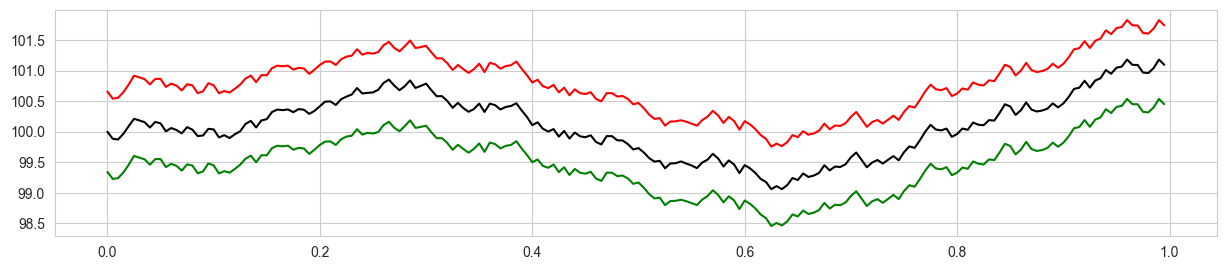

sigma = 2


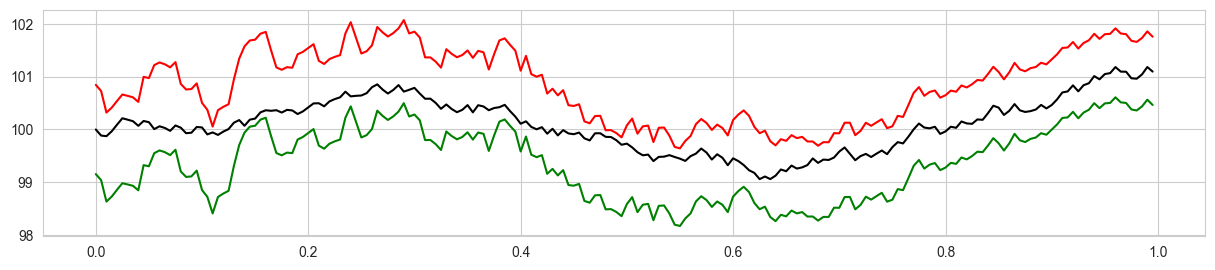

sigma = 4


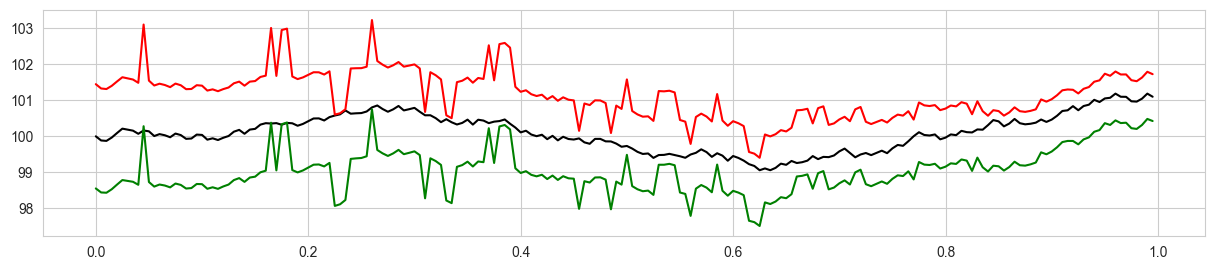

sigma = 8


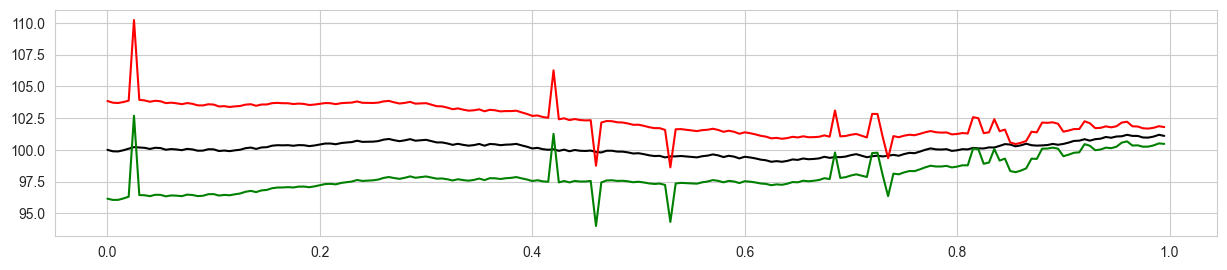

In [136]:
print('sigma = 0.5')
simulation(sigma = 0.5)
print('sigma = 2')
simulation(sigma = 2)
print('sigma = 4')
simulation(sigma = 4)
print('sigma = 8')
simulation(sigma = 8)

gamma = 0.1


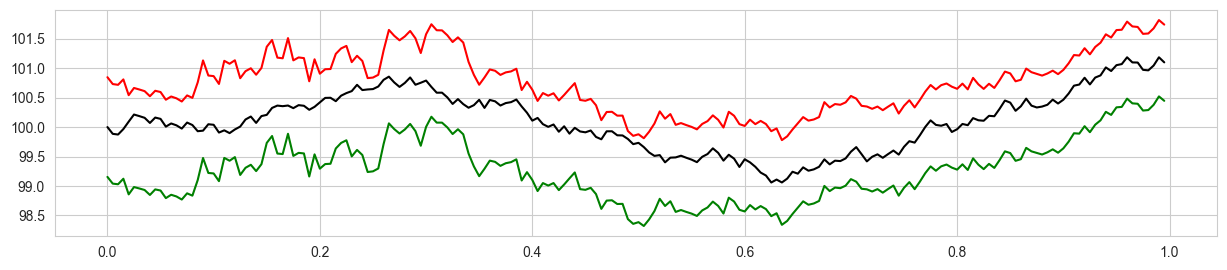

gamma = 0.2


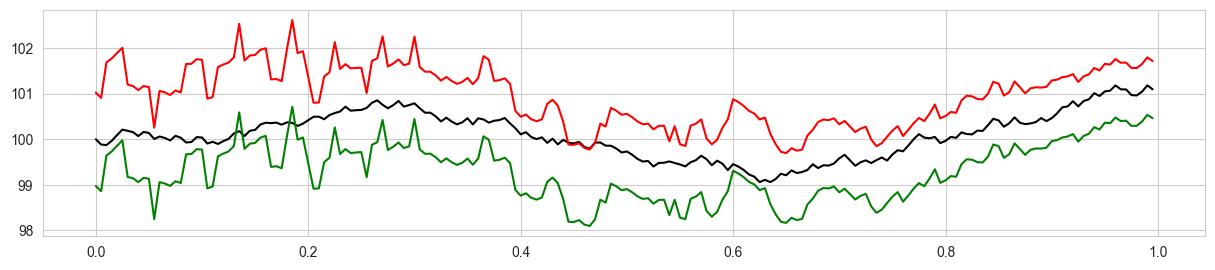

gamma = 0.4


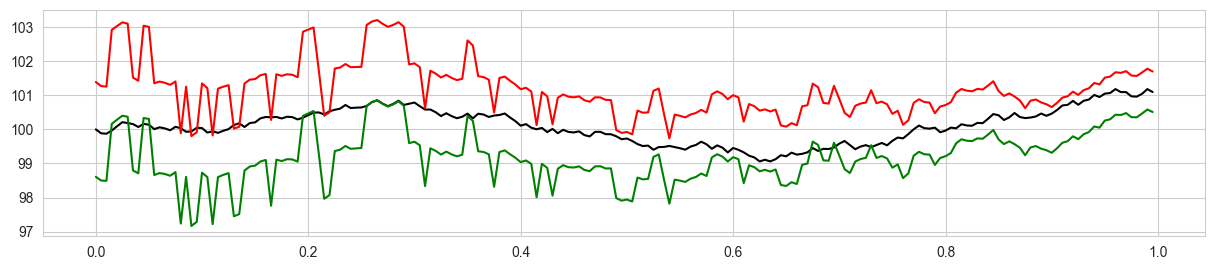

gamma = 0.8


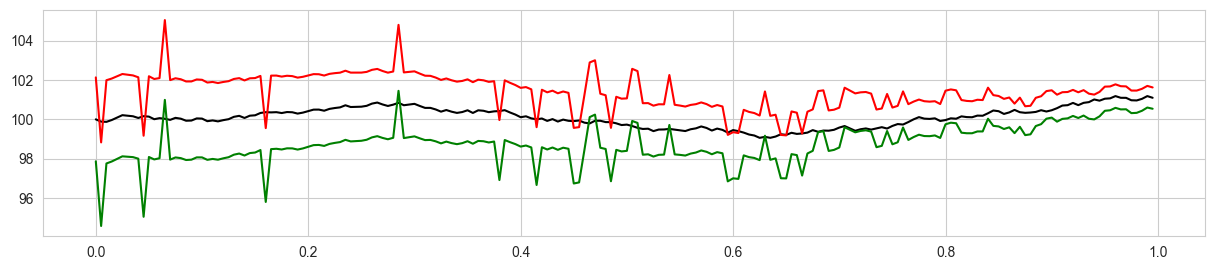

In [137]:
print('gamma = 0.1')
simulation(gamma = 0.1)
print('gamma = 0.2')
simulation(gamma = 0.2)
print('gamma = 0.4')
simulation(gamma = 0.4)
print('gamma = 0.8')
simulation(gamma = 0.8)

k = 0.7


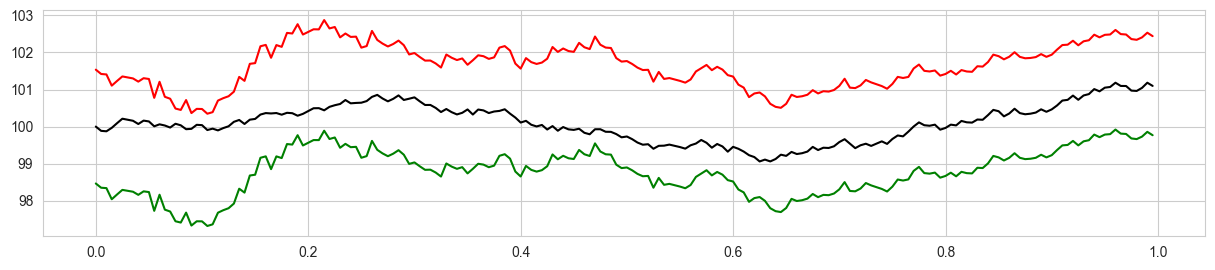

k = 1.5


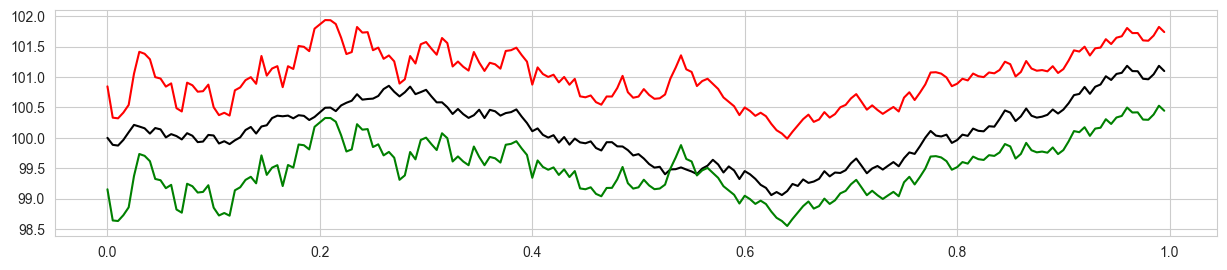

k = 3


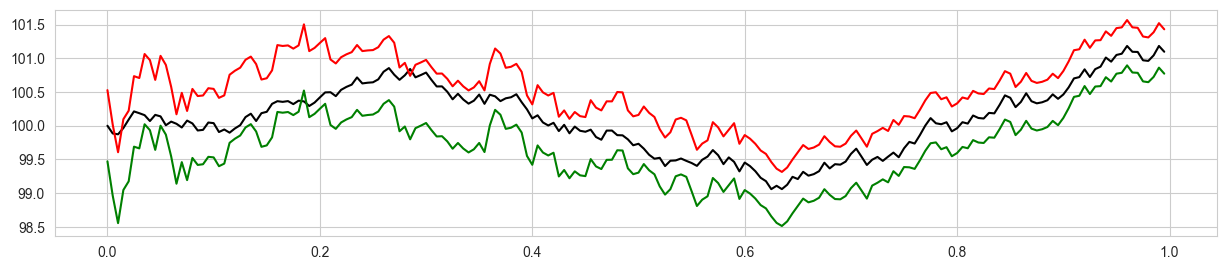

k = 6


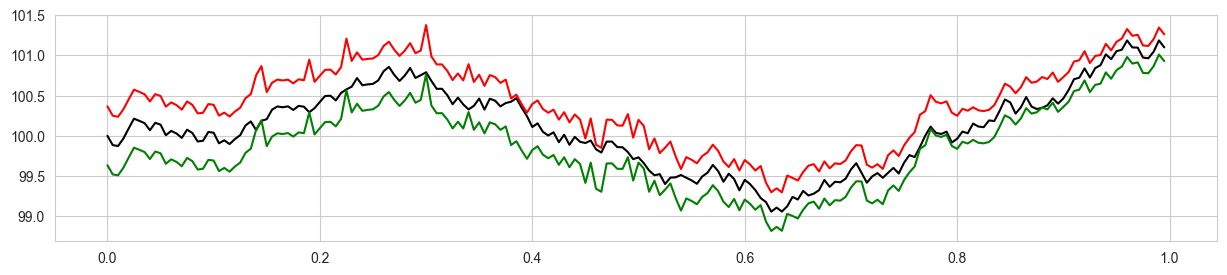

k = 12


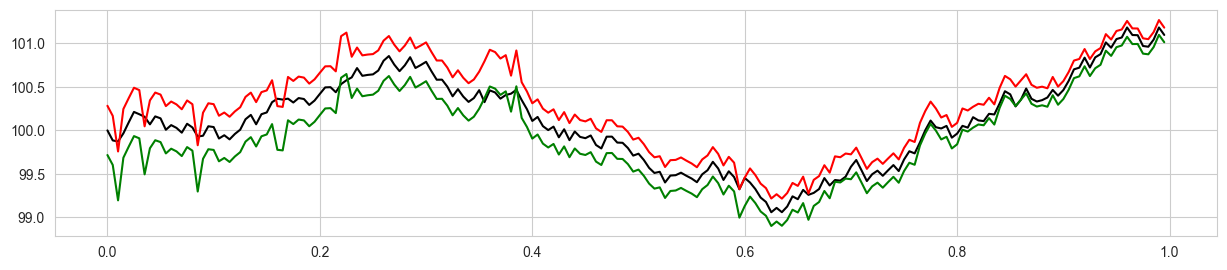

In [110]:
print('k = 0.7')
simulation(k = 0.7)
print('k = 1.5')
simulation(k = 1.5)
print('k = 3')
simulation(k = 3)
print('k = 6')
simulation(k = 6)
print('k = 12')
simulation(k = 12)

A = 70


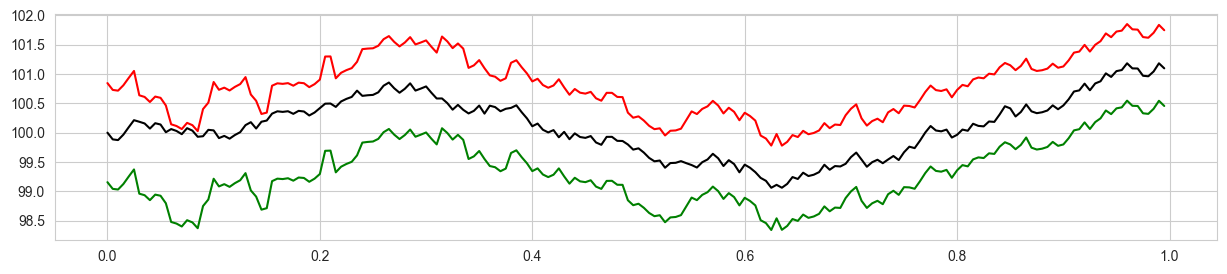

A = 140


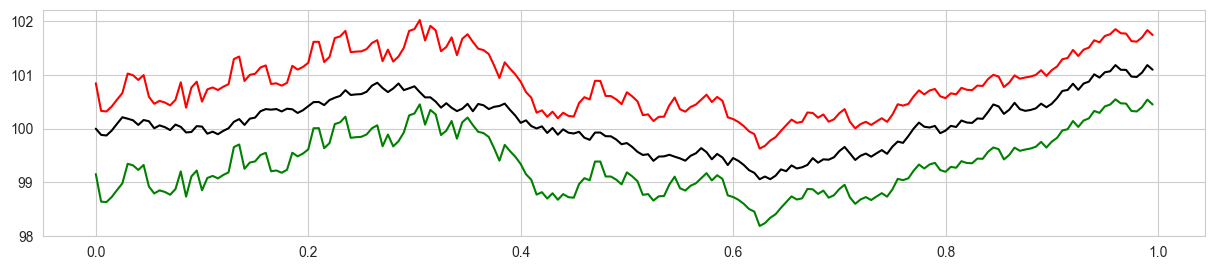

A = 280


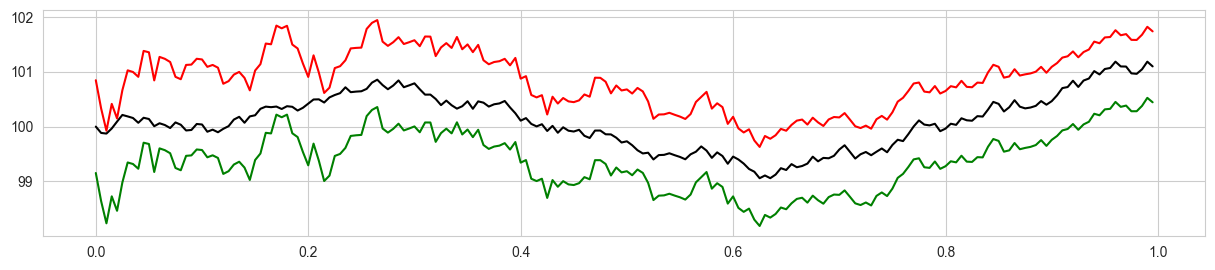

A = 560


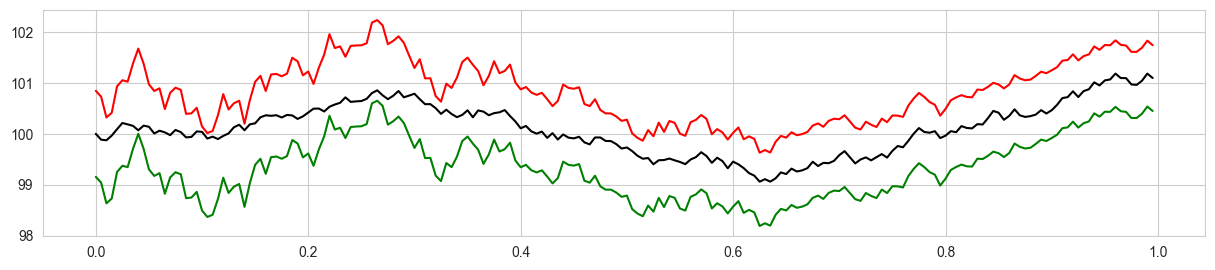

In [138]:
print('A = 70')
simulation(A = 70)
print('A = 140')
simulation(A = 140)
print('A = 280')
simulation(A = 280)
print('A = 560')
simulation(A = 560)

In [112]:
print(70 * math.e**(-1.5*delta_a))
print(560 * math.e**(-1.5*delta_a))

26.589361042820812
212.7148883425665


In [114]:
prob_a = 1 - math.e**(-26.589361042820812 * dt)
prob_b = 1 - math.e**(-212.7148883425665 * dt)
print(prob_a)
print(prob_b)

0.12448833647442747
0.6547803651352859
